In [1]:
# project: p10
# submitter: zdai38
# partner: none

In [2]:
import requests
import os
import pandas as pd
import math

In [3]:
def download(filename, url):
    if os.path.exists(filename):
        return (str(filename) + " already exists!")

    
    r = requests.get(url)
    r.raise_for_status()
    data = r.text
    f = open(filename,"w", encoding="utf-8")
    f.write(data)
    f.close()
    return (str(filename) + " created!")

In [4]:
download("countries.json", "https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/countries.json")

'countries.json already exists!'

In [5]:
def read_json(file):
    f = open(file, encoding="utf-8")
    df = pd.read_json(file)
    f.close()
    return df

countries = read_json("countries.json")

In [6]:
countries.head()

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA


In [7]:
#Q1: How many countries do we have in our dataset?
len(countries)

174

In [8]:
#Q2: what is the total population across all the countries in our dataset?
countries["population"].sum()

6261901793

In [9]:
download("capitals.json", "https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/capitals.json")
capitals = read_json("capitals.json")

In [10]:
capitals.head()

,country,capital,latitude,longitude
0,Afghanistan,Kabul,34.516667,69.183333
1,Albania,Tirana,41.316667,19.816667
2,Algeria,Algiers,36.750000,3.050000
3,Anguilla,The Valley,18.216667,-63.050000
4,Argentina,Buenos Aires,-34.583333,-58.666667


In [11]:
#Q3: What are the capital names in capitals.json?
list(capitals["capital"].sort_values())

['Abu Dhabi',
 'Abuja',
 'Accra',
 'Addis Ababa',
 'Algiers',
 'Amman',
 'Amsterdam',
 'Ankara',
 'Antananarivo',
 'Apia',
 'Ashgabat',
 'Asmara',
 'Astana',
 'Asuncion',
 'Athens',
 'Baghdad',
 'Baku',
 'Bamako',
 'Bangkok',
 'Beijing',
 'Beirut',
 'Belmopan',
 'Berlin',
 'Bern',
 'Bishkek',
 'Bissau',
 'Bogota',
 'Brasilia',
 'Bridgetown',
 'Brussels',
 'Bucharest',
 'Budapest',
 'Buenos Aires',
 'Bujumbura',
 'Cairo',
 'Canberra',
 'Caracas',
 'Castries',
 'Chisinau',
 'Colombo',
 'Conakry',
 'Copenhagen',
 'Dakar',
 'Damascus',
 'Dar es Salaam',
 'Dhaka',
 'Djibouti',
 'Doha',
 'Dublin',
 'Dushanbe',
 'Freetown',
 'Gaborone',
 'George Town',
 'Georgetown',
 'Guatemala City',
 'Hagatna',
 'Hamilton',
 'Hanoi',
 'Harare',
 'Havana',
 'Helsinki',
 'Islamabad',
 'Jakarta',
 'Jamestown',
 'Jerusalem',
 'Kabul',
 'Kampala',
 'Kathmandu',
 'Khartoum',
 'Kigali',
 'Kingston',
 'Kingstown',
 'Kuala Lumpur',
 'Kuwait City',
 'Kyiv',
 'La Paz',
 'Libreville',
 'Lilongwe',
 'Lima',
 'Lisbon',


In [12]:
#Q4: What is the capital of Italy?
capitals[capitals["country"] == "Italy"]["capital"].iloc[0]

'Rome'

In [13]:
capitals.head()

,country,capital,latitude,longitude
0,Afghanistan,Kabul,34.516667,69.183333
1,Albania,Tirana,41.316667,19.816667
2,Algeria,Algiers,36.750000,3.050000
3,Anguilla,The Valley,18.216667,-63.050000
4,Argentina,Buenos Aires,-34.583333,-58.666667


In [14]:
#Q5: Which country's capital is Brussels?
capitals[capitals["capital"] == "Brussels"]["country"].iloc[0]

'Belgium'

In [15]:
#Q6: Which 7 countries have the southern-most capitals?
list(capitals[["country","latitude"]].sort_values(by = "latitude")["country"][:7])

['New Zealand',
 'Australia',
 'Uruguay',
 'Argentina',
 'Chile',
 'Lesotho',
 'Swaziland']

In [16]:
#Q7: Which 10 countries have the capitals closest to the North Pole?
list(capitals[["country","latitude"]].sort_values(by = "latitude", ascending = False)["country"][:10])

['Iceland',
 'Finland',
 'Norway',
 'Estonia',
 'Sweden',
 'Latvia',
 'Russia',
 'Denmark',
 'Lithuania',
 'Belarus']

In [17]:
#Q8: What is the distance between Camp Randall Stadium and the Wisconsin State Capital?
def get_distance(p1,p2):
    if p1 == p2:
        return math.nan
    
    lat1 = math.radians(p1[0])
    lon1 = math.radians(p1[1])
    lat2 = math.radians(p2[0])
    lon2 = math.radians(p2[1])
        
    R = 3956 

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(min(1,math.sqrt(a)))

    return R * c
    
get_distance([43.070231,-89.411893], [43.074645,-89.384113])

1.433899492072933

In [18]:
#Q9: What is the distance between Germany and Norway?
Germany = list(capitals[capitals["country"] == "Germany"][["latitude", "longitude"]].iloc[0])
Norway = list(capitals[capitals["country"] == "Norway"][["latitude", "longitude"]].iloc[0])
get_distance(Germany,Norway)

520.8581822565817

In [19]:
#Q10: What are the distances between Switzerland, Netherlands and Spain?
def distance_df(country_list):
    country_dict = {}
    for i in country_list:
        country_dict[i] = list(capitals[capitals["country"] == i][["latitude", "longitude"]].iloc[0])
    
    distance = {}
    for i in country_dict:
        x = []
        for j in country_dict:
            x.append(get_distance(country_dict[i], country_dict[j]))
        distance[i] = x

    df = pd.DataFrame(distance, index = country_list)
    return df

distance_df(["Switzerland", "Netherlands", "Spain"])

,Switzerland,Netherlands,Spain
Switzerland,NaN,392.028643,714.804467
Netherlands,392.028643,NaN,919.684100
Spain,714.804467,919.684100,NaN


In [20]:
#Q11: What is the distance between every pair of countries in the South American continent?
def get_country_by_continent(continent):
    country = list(countries[countries["continent"]==continent]["country"])
    return country

distance_df(get_country_by_continent("South America"))

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
Chile,NaN,2897.553095,2636.644599,2895.810776,1869.737031,1180.741903,3043.657689,690.784168,1531.480189,2350.207788,833.403262,963.635535
Guyana,2897.553095,NaN,1105.066312,215.336336,1709.071018,1747.772670,646.969843,2857.520462,1837.860149,1483.193753,2878.638295,2214.288286
Colombia,2636.644599,1105.066312,NaN,1303.405134,2275.516286,1512.119255,639.361118,2885.355610,1167.505359,451.004119,2962.230943,2337.615967
Suriname,2895.810776,215.336336,1303.405134,NaN,1572.674232,1778.772975,861.456786,2799.886429,1944.750017,1661.699022,2809.744412,2153.855447
Brazil,1869.737031,1709.071018,2275.516286,1572.674232,NaN,1342.297074,2228.690679,1459.139733,1967.770515,2344.584922,1412.096335,908.185710
Bolivia,1180.741903,1747.772670,1512.119255,1778.772975,1342.297074,NaN,1865.131181,1379.455701,669.926372,1326.758656,1467.253638,906.799256
Venezuela,3043.657689,646.969843,639.361118,861.456786,2228.690679,1865.131181,NaN,3157.624051,1705.418003,1088.064117,3207.352176,2544.799572
Argentina,690.784168,2857.520462,2885.355610,2799.886429,1459.139733,1379.455701,3157.624051,NaN,1936.465790,2696.149591,143.069943,646.036441
Peru,1531.480189,1837.860149,1167.505359,1944.750017,1967.770515,669.926372,1705.418003,1936.465790,NaN,823.054491,2046.571589,1558.635236
Ecuador,2350.207788,1483.193753,451.004119,1661.699022,2344.584922,1326.758656,1088.064117,2696.149591,823.054491,NaN,2791.196721,2218.650964


In [21]:
#Q12: What is the most central country in the South American continent?
def get_country_most_central(continent):
    df = distance_df(get_country_by_continent(continent))
    SA_mean = {}
    for i in df:
        SA_mean[i]=df[i].mean()
    s = pd.Series(SA_mean)
    
    df["Mean"] = s
    return df.sort_values(by="Mean").iloc[0].name
    
get_country_most_central("South America")

'Bolivia'

In [22]:
#Q13: What is the least central country in South America?
def get_country_least_central(continent):
    df = distance_df(get_country_by_continent(continent))
    SA_mean = {}
    for i in df:
        SA_mean[i]=df[i].mean()
    s = pd.Series(SA_mean)
    
    df["Mean"] = s
    return df.sort_values(by="Mean", ascending = False).iloc[0].name
    
get_country_least_central("South America")

'Uruguay'

In [23]:
df = distance_df(get_country_by_continent("South America"))
df.sort_values(by = "Guyana").iloc[0].name

'Suriname'

In [24]:
#Q14: How close is each country in South America to it's nearest neighbor?
def get_nearest_country(continent):
    nearest = []
    distance = []
    df = distance_df(get_country_by_continent(continent))
    for i in range(len(df)):        
        nearest.append(df.sort_values(by = df.iloc[i].name).iloc[0].name)
        distance.append(df.iloc[i].min())
        
    new_df = pd.DataFrame({"nearest":nearest, "distance":distance}, index = get_country_by_continent(continent))
    return new_df
get_nearest_country("South America")

,nearest,distance
Chile,Argentina,690.784168
Guyana,Suriname,215.336336
Colombia,Ecuador,451.004119
Suriname,Guyana,215.336336
Brazil,Paraguay,908.185710
Bolivia,Peru,669.926372
Venezuela,Colombia,639.361118
Argentina,Uruguay,143.069943
Peru,Bolivia,669.926372
Ecuador,Colombia,451.004119


In [25]:
#Q15: How far is each country in South America to it's furthest neighbor?
def get_furthest_country(continent):
    furthest = []
    distance = []
    df = distance_df(get_country_by_continent(continent))
    for i in range(len(df)):        
        furthest.append(df.sort_values(by = df.iloc[i].name, ascending = False).iloc[0].name)
        distance.append(df.iloc[i].max())
        
    new_df = pd.DataFrame({"furthest":furthest, "distance":distance}, index = get_country_by_continent(continent))
    return new_df
get_furthest_country("South America")

,furthest,distance
Chile,Venezuela,3043.657689
Guyana,Chile,2897.553095
Colombia,Uruguay,2962.230943
Suriname,Chile,2895.810776
Brazil,Ecuador,2344.584922
Bolivia,Venezuela,1865.131181
Venezuela,Uruguay,3207.352176
Argentina,Venezuela,3157.624051
Peru,Uruguay,2046.571589
Ecuador,Uruguay,2791.196721


In [26]:
import sqlite3
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

# remember to do conn.close() at the end of your notebook

In [27]:
pd.read_sql("select * from sqlite_master", conn)

,type,name,tbl_name,rootpage,sql
0,table,countries,countries,2,"CREATE TABLE ""countries"" (\n""area"" INTEGER,\n ..."
1,table,capitals,capitals,8,"CREATE TABLE ""capitals"" (\n""country"" TEXT,\n ..."


In [28]:
#Q16: In our dataset, how many countries are in each continent?
def qry(sql):
    return pd.read_sql(sql, conn)

num_countries = qry("""
SELECT continent,COUNT(*) AS ` number of countries `
FROM countries
GROUP BY continent
ORDER BY ` number of countries `
""")
num_countries

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,47


In [29]:
import matplotlib
matplotlib.rcParams["font.size"] = 12

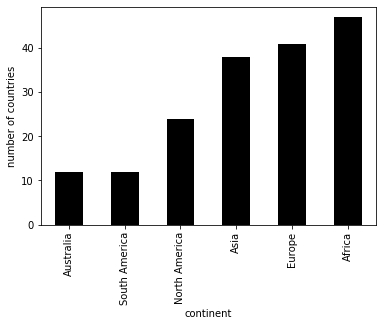

In [30]:
#Q17: How many countries are in each continent? (answer with a plot)
num_countries_idx = num_countries.set_index("continent")
ax = num_countries_idx.plot.bar(color = "k", legend=False)
ax.set_xlabel("continent")
ax.set_ylabel("number of countries")
None

In [31]:
#Q18: What is the total area of each continent?
area_conti = qry("""
SELECT continent,sum(area) AS ` total area `
FROM countries
GROUP BY continent
ORDER BY ` total area ` DESC
""")
area_conti

,continent,total area
0,Asia,29731231
1,Africa,25199550
2,Europe,23708430
3,North America,22327685
4,South America,17715335
5,Australia,8488612


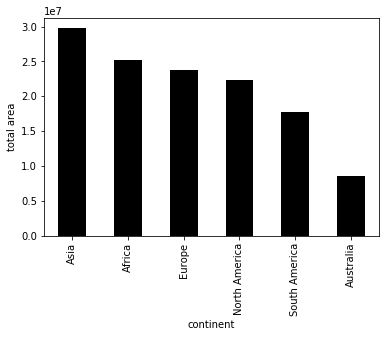

In [32]:
#Q19: What is the total area of each continent? (answer with a plot)
area_conti_idx = area_conti.set_index("continent")
ax = area_conti_idx.plot.bar(color = "k", legend=False)
ax.set_xlabel("continent")
ax.set_ylabel("total area")
None

In [33]:
#Q20: What is the area of each country in South America?
qry("""
select country, area
from countries
where continent = "South America"
order by area desc
""")

,country,area
0,Brazil,8511965
1,Argentina,2766890
2,Peru,1285220
3,Colombia,1138910
4,Bolivia,1098580
5,Venezuela,912050
6,Chile,756950
7,Paraguay,406750
8,Ecuador,283560
9,Guyana,214970


In [34]:
#Q21: What are the top 8 countries that have the largest real GDP?
real_gdp_rank = qry("""
select country, (population * `gdp-per-capita`) as `real GDP (billion)`
from countries
order by `real GDP (billion)` desc
limit 8
""")
real_gdp_rank["real GDP (billion)"] = real_gdp_rank["real GDP (billion)"]/1000000000
real_gdp_rank

,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690


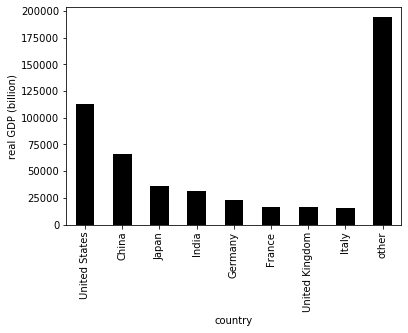

In [35]:
#Q22: What are the top 8 countries that have the largest real GDP? (answer with a plot)
real_gdp = qry("""
select country, population * `gdp-per-capita` / 100000000 as `real GDP (billion)`
from countries
order by `real GDP (billion)` desc
""")

real_gdp_idx = real_gdp.set_index("country")
real_gdp_idx_other = real_gdp_idx["real GDP (billion)"][:8]
real_gdp_idx_other["other"] = real_gdp_idx["real GDP (billion)"][8:].sum()

ax = real_gdp_idx_other.plot.bar(color = "k", legend=False)
ax.set_xlabel("country")
ax.set_ylabel("real GDP (billion)")
None

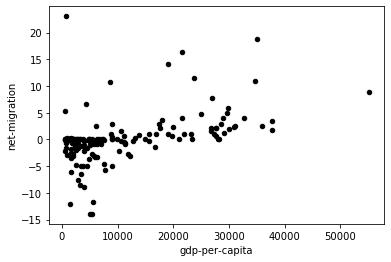

In [36]:
#Q23: What is the relationship between GDP per capita and net-migration?
gdp_migration = qry("""
select `gdp-per-capita`, `net-migration`
from countries
""")

ax = gdp_migration.plot.scatter(x = "gdp-per-capita",y = "net-migration",color = "k", legend=False)
ax.set_xlabel("gdp-per-capita")
ax.set_ylabel("net-migration")
None

In [37]:
#Q24: What is the correlation between GDP per capita and net-migration?
gdp_migration.corr().iloc[0][1]

0.4523211325011283

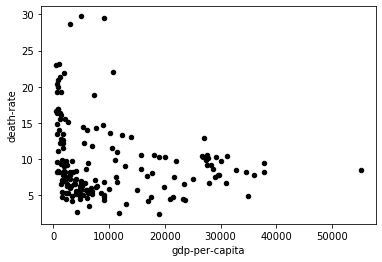

In [38]:
#Q25: What is the relationship between GDP per capita and death rates?:
gdp_death = qry("""
select `gdp-per-capita`, `death-rate`
from countries
""")

ax = gdp_death.plot.scatter(x = "gdp-per-capita",y = "death-rate",color = "k", legend=False)
ax.set_xlabel("gdp-per-capita")
ax.set_ylabel("death-rate")
None

,gdp-per-capita,infant-mortality
0,9900,8.80
1,16900,17.27
2,4900,25.69
3,1000,61.47
4,1600,29.45
...,...,...
169,6000,31.00
170,30900,3.31
171,2200,12.62
172,1600,73.45


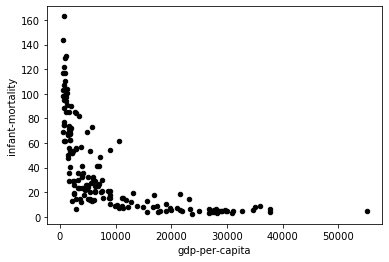

In [39]:
#Q26: What is the relationship between GDP per capita and infant-mortality?
gdp_infant = qry("""
select `gdp-per-capita`, `infant-mortality`
from countries
""")

ax = gdp_infant.plot.scatter(x = "gdp-per-capita",y = "infant-mortality",color = "k", legend=False)
ax.set_xlabel("gdp-per-capita")
ax.set_ylabel("infant-mortality")
None
gdp_infant

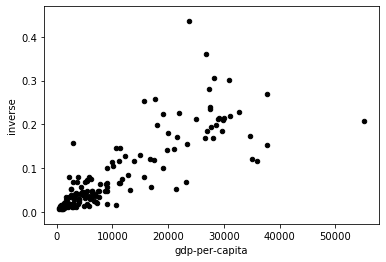

In [40]:
#Q27: What is the relationship between GDP per capita and inverse of infant-mortality?
gdp_infant["inverse"] = 1/gdp_infant["infant-mortality"]

ax = gdp_infant.plot.scatter(x = "gdp-per-capita",y = "inverse",color = "k", legend=False)
ax.set_xlabel("gdp-per-capita")
ax.set_ylabel("inverse")
None

In [41]:
#Q28: fit a y = m * x + n line to the scatter plot in question 27 using the least-squares method; what are the coefficients m and n?
import numpy as np

gdp_infant["1"] = 1

res = np.linalg.lstsq(gdp_infant[["gdp-per-capita", "1"]], gdp_infant["inverse"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
tuple(coefficients)

(6.482983154848297e-06, 0.013237849092120857)

In [42]:
#Q29: When gdp-per-capita = 50000, what is the expected value for infant-mortality?
m = coefficients[0] # slope
n = coefficients[1] # intercept

gdp = 50000
1/(gdp * m + n)

2.963955279079342

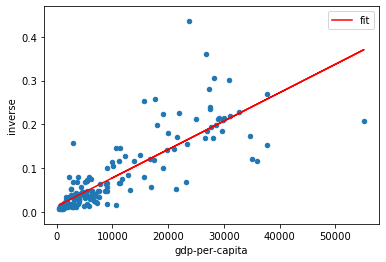

In [43]:
#Q30: plot the regression line to the scatter plot
ax = gdp_infant.plot.scatter(x="gdp-per-capita", y="inverse")
gdp_infant["fit"] = gdp_infant["gdp-per-capita"] * m + n
gdp_infant.plot.line(x="gdp-per-capita", y='fit', c='red', ax=ax)
None